## Data import and initial cleanup

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import warnings

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# to ignore warnings
warnings.filterwarnings('ignore')

# adjust the display settings so that the columns will not get truncated
pd.set_option('display.max_columns', None)

# reading the input
data = pd.read_csv('laptop.csv')

# check out the data
data.head(3)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
# since price is the target, let's check the corresponding rows with null values
data[data['Price'].isnull()].head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remove the first two unnamed columns as they just seem to represent row ids
# and remove the blank rows
data = data[data.columns[2:]]
data = data.dropna(how='all')

# check and remove duplicates in the data
print(f'No. of rows with and without duplicates: {data.shape[0]}, {data.drop_duplicates().shape[0]}')
print('----------------------')
data = data.drop_duplicates()

# check if we still have any missing values
print(data.isnull().sum())

No. of rows with and without duplicates: 1273, 1244
----------------------
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


## EDA and Feature Engineering

In [ ]:
# let's start with categorical columns
col_name = 'Company'
print('Total no. of unique values:', data[col_name].nunique(), end='\n\n')
data[col_name].unique()

Total no. of unique values: 19



array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

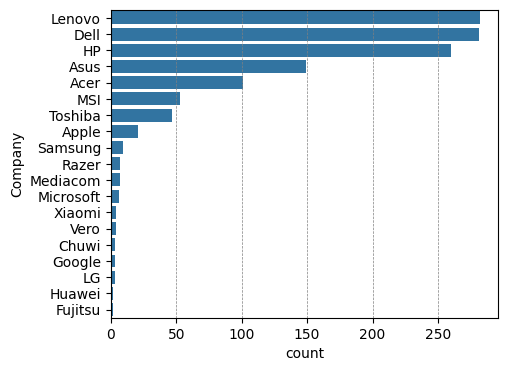

In [ ]:
# to turn off the legend globally
plt.rc('legend', frameon=False)

plt.figure(figsize=(5, 4))
sns.countplot(data, y=col_name, order=data[col_name].value_counts().index)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
plt.show()

Top 5 companies based on frequency are: **Lenovo, Dell, HP, Asus, Acer**.

And similarly bottom 5 are: **Fujitsu, Huawei, LG, Google, Chuwi**.

In [ ]:
col_name = 'TypeName'
data[col_name].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

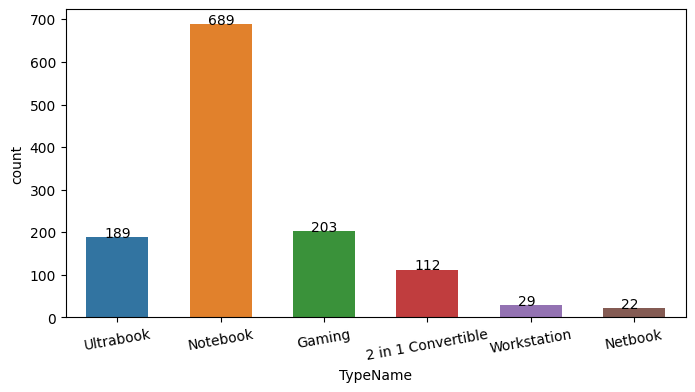

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data, x=col_name, hue=col_name, width=0.6)

for patch in ax.patches:
  ax.annotate(int(patch.get_height()), (patch.get_x()+0.175, patch.get_height()))
plt.xticks(rotation=10)
plt.show()

Notebook type's popularity seems greater than that of all others combined.

In [ ]:
col_name = 'Inches'
data[col_name].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [ ]:
# let's make inches column of float type with 1 decimal point
data[col_name] = data[col_name].apply(lambda x: np.NaN if x=='?' else round(float(x), 1))
data[col_name].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 17.3, 13.5, 12.5, 13. , 18.4, 13.9,
       11.6, 25.6, 35.6, 12.3, 27.3, 24. , 33.5,  nan, 31.6, 17. , 15. ,
       14.1, 11.3, 10.1])

<Axes: xlabel='Inches', ylabel='Count'>

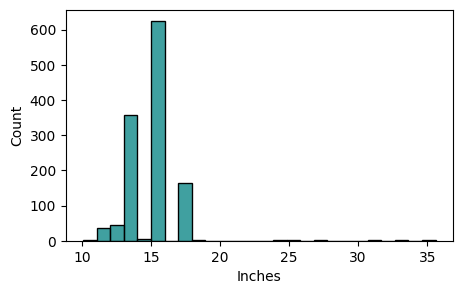

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data, x=col_name, binwidth=1, color='teal')

Most of the data is between 11 and 18 inches.

There seems to be a few outliers until 36 inches value.

In [ ]:
# screen resolution has many unique values, hence just displaying few
col_name = 'ScreenResolution'
print('Total no. of unique values:', data[col_name].nunique(), end='\n\n')
data[col_name].sample(25).unique()

Total no. of unique values: 40



array(['1366x768', 'Full HD 1920x1080',
       'IPS Panel Retina Display 2880x1800',
       'IPS Panel Full HD 1920x1080',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Full HD 2160x1440', 'Full HD / Touchscreen 1920x1080'],
      dtype=object)

In [ ]:
# screen resolution column contains a lot of info, hence, we can extract to get useful features
# resolution as column
data['Resolution'] = data[col_name].str.extract(r'(\d+x\d+)', expand=False)
data[[col_name, 'Resolution']].head()

,ScreenResolution,Resolution
0,IPS Panel Retina Display 2560x1600,2560x1600
1,1440x900,1440x900
2,Full HD 1920x1080,1920x1080
3,IPS Panel Retina Display 2880x1800,2880x1800
4,IPS Panel Retina Display 2560x1600,2560x1600


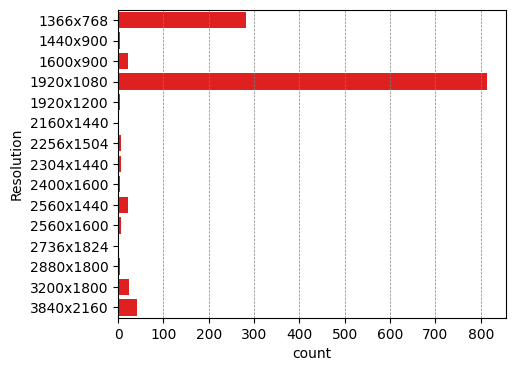

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data, y='Resolution', color='red', order=data['Resolution'].sort_values().unique())
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
plt.show()

There is no particular pattern here and the majority of values are: **1920x1080** and **1366x768**.

In [ ]:
# touchscreen yes/no (1/0) as a column
new_col = 'HasTouchscreen'
data[new_col] = data[col_name].str.contains('Touchscreen').astype(np.int8)
data[new_col].unique()

array([0, 1], dtype=int8)

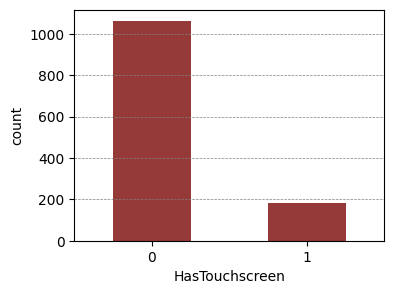

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data, x=new_col, color='brown', width=0.5)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.show()

More than 1000 laptops (85%) do not have a touchscreen feature.

In [ ]:
# display type - full hd, ultra hd, etc as a column
def get_display_type(value):
    if 'Retina' in value:
        result = 'IPS Panel Retina Display'
    elif 'Panel Full' in value:
        result = 'IPS Panel Full HD'
    elif 'Full' in value:
        result = 'Full HD'
    elif 'Panel Quad' in value:
        result = 'IPS Panel Quad HD+'
    elif 'Quad' in value:
        result = 'Quad HD+'
    elif 'Panel' in value and '4K' in value:
        result = 'IPS Panel 4K Ultra HD'
    elif '4K' in value:
        result = '4K Ultra HD'
    elif 'Panel' in value:
        result = 'IPS Panel'
    else:
        result = np.NaN
    return result

new_col = 'DisplayType'
data[new_col] = data[col_name].apply(get_display_type)
data[new_col].unique()

array(['IPS Panel Retina Display', nan, 'Full HD', 'IPS Panel Full HD',
       'Quad HD+', 'IPS Panel', 'IPS Panel 4K Ultra HD', '4K Ultra HD',
       'IPS Panel Quad HD+'], dtype=object)

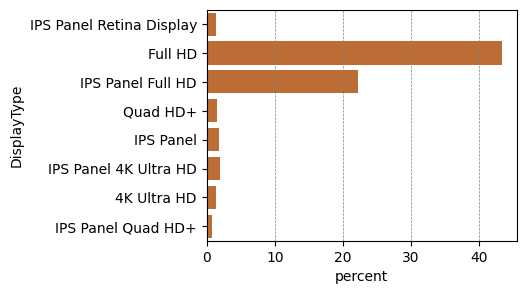

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data, y=new_col, color='#d2691e', stat='percent')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
plt.show()

**Full HD** & **IPS Panel Full HD** seems to be more than 60% of the data.

In [ ]:
# cpu has lot of unique values and hence looking at a sample's unique values
col_name = 'Cpu'
print('Total no. of unique values:', data[col_name].nunique(), end='\n\n')
data[col_name].sample(25).unique()

Total no. of unique values: 118



array(['Intel Core i3 7100U 2.4GHz', 'Intel Core i7 6700HQ 2.6GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core M M7-6Y75 1.2GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Core i7 7820HQ 2.9GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core i5 8250U 1.6GHz',
       'Intel Core i7 7700HQ 2.8GHz', 'Intel Core i7 7500U 2.7GHz',
       'Intel Core i7 8550U 1.8GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i7 6500U 2.5GHz', 'AMD E-Series 9000e 1.5GHz'],
      dtype=object)

In [ ]:
# cpu value seems to have model details and processing speed (ghz)
# let's split them up
new_col = 'SpeedInGHz'
data[[col_name, new_col]] = data[col_name].str.extract(r'(.+) ([\d\.]+)GHz')
data[new_col] = data[new_col].apply(lambda x: round(float(x), 1))

data[[col_name, new_col]].head()

,Cpu,SpeedInGHz
0,Intel Core i5,2.3
1,Intel Core i5,1.8
2,Intel Core i5 7200U,2.5
3,Intel Core i7,2.7
4,Intel Core i5,3.1


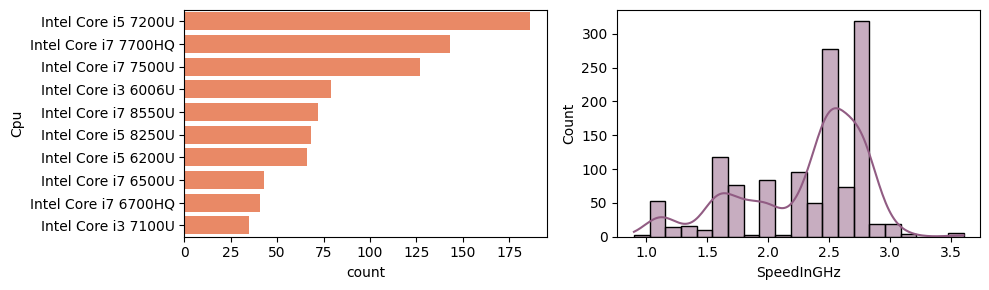

In [ ]:
# since cpu column has many unique values, displaying only the top 10
# do similarly if needed for the bottom 10 using the tail method
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(data, y=col_name, color='#ff7f50', ax=axes[0],
              order=data[col_name].value_counts().head(10).index)
sns.histplot(data, x=new_col, color='#915c83', ax=axes[1], kde=True)
plt.tight_layout()
plt.show()

Count seems to be generally increasing along with the processing speed value and finally drops at 3 ghz.

In [ ]:
col_name = 'Ram'
data[col_name].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [ ]:
# let's make this numeric by creating ram in gb column
new_col = 'RamInGB'
data[new_col] = data[col_name].str.replace('GB', '').astype(np.int16)
data[[col_name, new_col]].drop_duplicates()

,Ram,RamInGB
0,8GB,8
3,16GB,16
5,4GB,4
31,2GB,2
44,12GB,12
71,64GB,64
98,6GB,6
177,32GB,32
438,24GB,24
706,1GB,1


<Axes: xlabel='RamInGB', ylabel='count'>

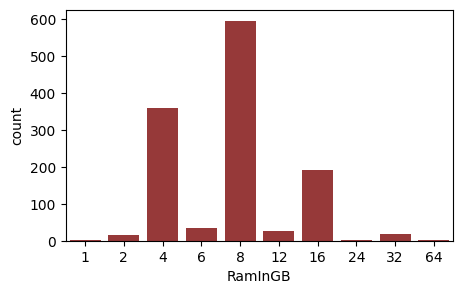

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data, x=new_col, color='#a52a2a')

Top 3 values are **`8GB, 4GB and 16GB`** respectively.

In [ ]:
col_name = 'Memory'
data[col_name].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
# memory column has 4 types - SSD, HDD, Flash Storage, Hybrid
# usually prices vary depending on the type of memory
# hence, we should split this column

# creating functions for the same
def get_val_in_gb(val):
    if 'TB' in val:
        pos = val.find('TB')
        res = (int(float(val[:pos])) * 1024)
    else:
        pos = val.find('GB')
        res = int(float(val[:pos]))
    return res

# new column names after split
memory_cols = ['SSDMemoryInGB', 'HDDMemoryInGB', 'FSMemoryInGB', 'HybridMemoryInGB']

In [ ]:
def split_memory(text):
    # variables reflecting GBs of memory
    ssd, hdd, flash, hybrid = 0, 0, 0, 0
    if text != '?':
        vals = [x.strip() for x in text.split('+')]
        for val in vals:
            if 'SSD' in val:
                ssd += get_val_in_gb(val)
            elif 'HDD' in val:
                hdd += get_val_in_gb(val)
            elif 'Flash' in val:
                flash += get_val_in_gb(val)
            elif 'Hybrid' in val:
                hybrid += get_val_in_gb(val)
    return pd.Series([ssd, hdd, flash, hybrid], index=memory_cols)

In [ ]:
result_df = data[col_name].apply(split_memory)
data = pd.concat([data, result_df], axis=1)

data[[col_name, *memory_cols]].sample(5)

,Memory,SSDMemoryInGB,HDDMemoryInGB,FSMemoryInGB,HybridMemoryInGB
752,1TB HDD,0,1024,0,0
831,512GB SSD,512,0,0,0
25,1TB HDD,0,1024,0,0
1256,128GB SSD + 1TB HDD,128,1024,0,0
1188,256GB SSD,256,0,0,0


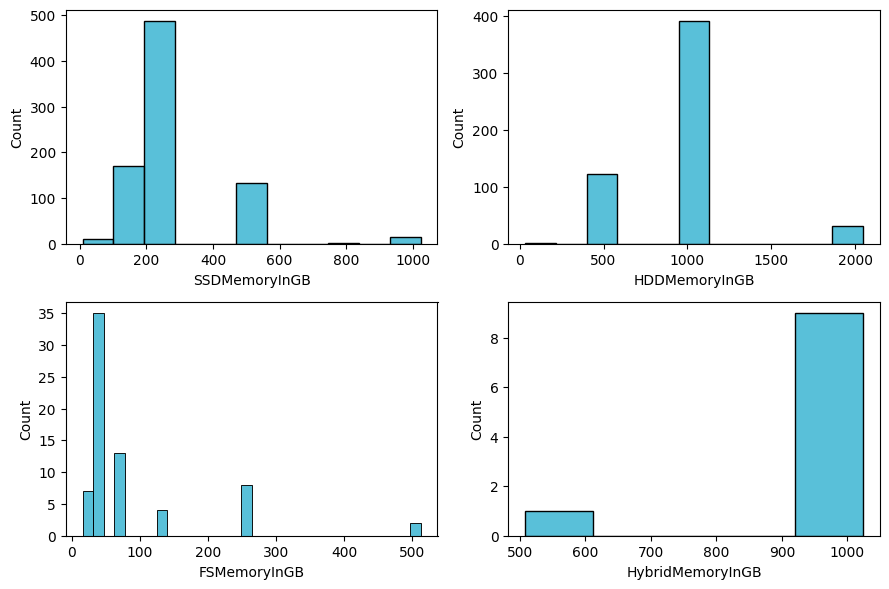

In [ ]:
# temporarily converting 0s to nan for plotting
data_temp = data[[*memory_cols]].replace(0, np.NaN)
fig, axes = plt.subplots(2, 2, figsize=(9, 6))

sns.histplot(data_temp, x=memory_cols[0], color='#21abcd', ax=axes[0,0])
sns.histplot(data_temp, x=memory_cols[1], color='#21abcd', ax=axes[0,1])
sns.histplot(data_temp, x=memory_cols[2], color='#21abcd', ax=axes[1,0])
sns.histplot(data_temp, x=memory_cols[3], color='#21abcd', ax=axes[1,1])

plt.tight_layout()
plt.show()

SSD, HDD are most prominent in the data, followed by Hybrid and Flash Storage.

In [ ]:
# gpu has lot of unique values and hence looking at a sample's unique values
col_name = 'Gpu'
print('Total no. of unique values:', data[col_name].nunique(), end='\n\n')
data[col_name].sample(25).unique()

Total no. of unique values: 110



array(['AMD Radeon R4 Graphics', 'Nvidia GeForce 920',
       'Intel HD Graphics 520', 'AMD Radeon 540', 'Intel HD Graphics 620',
       'Nvidia GeForce 930MX ', 'Nvidia GeForce 940MX',
       'Intel HD Graphics', 'Nvidia GeForce GTX 1050',
       'Nvidia GeForce GTX 970M', 'Intel Iris Plus Graphics 640',
       'Nvidia GeForce GTX 1070', 'Intel HD Graphics 505',
       'Intel UHD Graphics 620', 'Nvidia Quadro M2200M'], dtype=object)

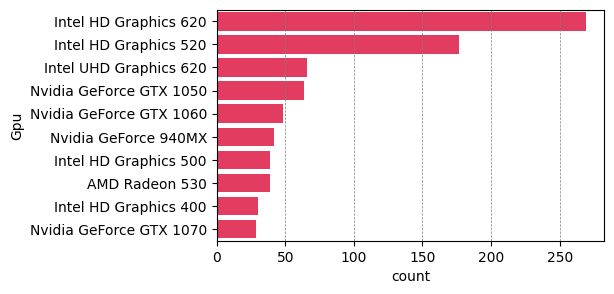

In [ ]:
# since gpu column has many unique values, displaying only the top 10
# do similarly if needed for the bottom 10 using the tail method
plt.figure(figsize=(5, 3))
sns.countplot(data, y=col_name, color='#ff2052', order=data[col_name].value_counts().head(10).index)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
col_name = 'OpSys'
data[col_name].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

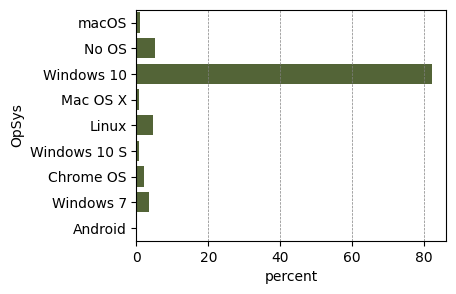

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data, y=col_name, color='#556b2f', stat='percent')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
plt.show()

More than 80% of laptops seems to have Windows 10 as the OS.

In [ ]:
# weight has lot of unique values and hence looking at a sample's unique values
col_name = 'Weight'
print('Total no. of unique values:', data[col_name].nunique(), end='\n\n')
data[col_name].sample(25).unique()

Total no. of unique values: 189



array(['2.04kg', '2kg', '2.7kg', '2.18kg', '2.4kg', '1.86kg', '1.7kg',
       '3kg', '2.2kg', '1.05kg', '1.99kg', '1.29kg', '1.1kg', '1.3kg',
       '1.96kg', '2.37kg', '2.59kg', '1.42kg', '2.62kg', '1.4kg'],
      dtype=object)

In [ ]:
# let's make a weight in kg column and make it a float with 2 decimal points
new_col = 'WeightInKg'
data[new_col] = data[col_name].apply(lambda x: np.NaN if x=='?' else round(float(x.replace('kg', '')), 2))
data[[col_name, new_col]].sample(5)

,Weight,WeightInKg
48,2.3kg,2.30
852,2.83kg,2.83
294,2.05kg,2.05
1058,1.6kg,1.60
584,1.26kg,1.26


<Axes: xlabel='WeightInKg', ylabel='Count'>

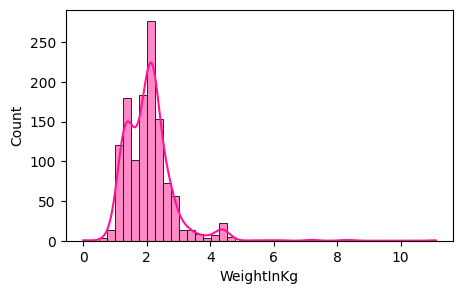

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data, x=new_col, binwidth=0.25, color='#ff1493', kde=True)

The graph seems similar to a normal distribution and the majority of values lie between 1 and 3 Kgs.

And there are few outliers until 11 Kg value.

In [ ]:
# price has lot of unique values and hence looking at a sample's unique values
col_name = 'Price'
data[col_name].sample(20).unique()

array([ 32660.64  , 147832.2864,  59513.2272,  69210.72  ,  78647.1408,
        90522.72  ,  68837.76  , 117119.5632,  50562.72  ,  46300.32  ,
       101657.7072,  25840.8   , 121318.56  ,  60031.1088,  74485.44  ,
       100550.5488,  27864.9072, 108744.48  ,  82351.6992,  26586.72  ])

In [ ]:
# let's make the price column standardized with 2 decimal places
data[col_name] = data[col_name].round(2)
data[col_name].sample(20).unique()

array([ 86793.12,  38841.12,  46886.4 ,  51841.44,  11231.42,  28185.12,
        44169.12,  74538.72,  24935.04,  59620.32,  18488.16, 103523.04,
       146519.47,  63349.92,  88924.32,  94572.  ,  58554.72,  48484.8 ,
        32447.52,  69477.12])

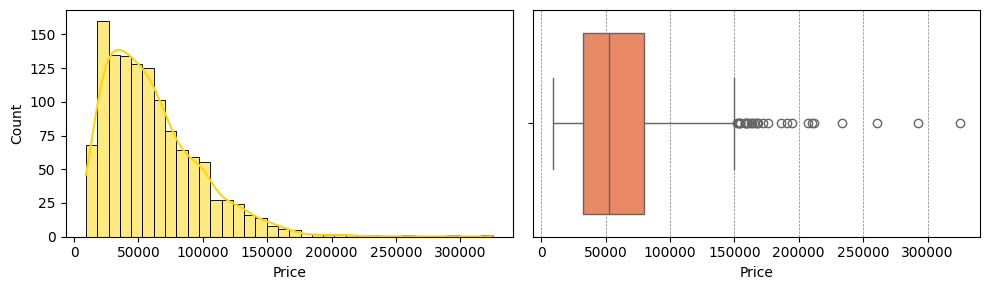

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(data, x=col_name, color='#ffd700', ax=axes[0], kde=True)
sns.boxplot(data, x=col_name, color='#ff7f50', ax=axes[1])
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

The target, i.e. price values seem to follow a bell kind curve.

And we can see that from the boxplot, that there are a lot of outliers from 150000 onwards.

1244 39



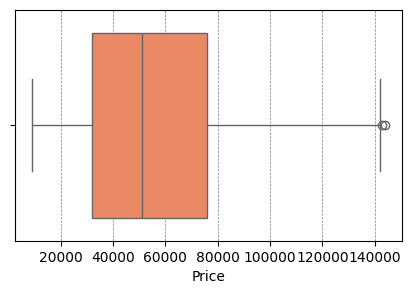

In [ ]:
# checking the row count for outliers (on repeated checks, it was 144K, not 150K)
print(data.shape[0], data[data[col_name] > 144000].shape[0], end='\n\n')

# removing outliers
data = data[data[col_name] <= 144000]

# checking the graph again
plt.figure(figsize=(5, 3))
sns.boxplot(data, x=col_name, color='#ff7f50')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
plt.show()

Most of the outliers are removed.

In [ ]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Resolution',
       'HasTouchscreen', 'DisplayType', 'SpeedInGHz', 'RamInGB',
       'SSDMemoryInGB', 'HDDMemoryInGB', 'FSMemoryInGB', 'HybridMemoryInGB',
       'WeightInKg'],
      dtype='object')

In [ ]:
clean_data = data[['Company', 'TypeName', 'Inches', 'Cpu', 'Gpu', 'OpSys', 'Price',
    'Resolution', 'HasTouchscreen', 'DisplayType', 'SpeedInGHz', 'RamInGB',
    'SSDMemoryInGB', 'HDDMemoryInGB', 'FSMemoryInGB', 'HybridMemoryInGB', 'WeightInKg']]
print(clean_data.shape)

clean_data.head(3)

(1205, 17)


,Company,TypeName,Inches,Cpu,Gpu,OpSys,Price,Resolution,HasTouchscreen,DisplayType,SpeedInGHz,RamInGB,SSDMemoryInGB,HDDMemoryInGB,FSMemoryInGB,HybridMemoryInGB,WeightInKg
0,Apple,Ultrabook,13.3,Intel Core i5,Intel Iris Plus Graphics 640,macOS,71378.68,2560x1600,0,IPS Panel Retina Display,2.3,8,128,0,0,0,1.37
1,Apple,Ultrabook,13.3,Intel Core i5,Intel HD Graphics 6000,macOS,47895.52,1440x900,0,NaN,1.8,8,0,0,128,0,1.34
2,HP,Notebook,15.6,Intel Core i5 7200U,Intel HD Graphics 620,No OS,30636.00,1920x1080,0,Full HD,2.5,8,256,0,0,0,1.86


In [ ]:
clean_data.describe(include='all')

,Company,TypeName,Inches,Cpu,Gpu,OpSys,Price,Resolution,HasTouchscreen,DisplayType,SpeedInGHz,RamInGB,SSDMemoryInGB,HDDMemoryInGB,FSMemoryInGB,HybridMemoryInGB,WeightInKg
count,1205,1205,1204.000000,1205,1205,1205,1205.000000,1205,1205.000000,887,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1204.000000
unique,19,6,NaN,89,100,9,NaN,15,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Lenovo,Notebook,NaN,Intel Core i5 7200U,Intel HD Graphics 620,Windows 10,NaN,1920x1080,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,276,686,NaN,186,268,988,NaN,790,NaN,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,15.085299,NaN,NaN,NaN,56883.602299,NaN,0.146058,NaN,2.288465,8.087137,176.444813,421.679668,4.687137,6.370124,2.036769
std,NaN,NaN,1.938045,NaN,NaN,NaN,30830.313735,NaN,0.353311,NaN,0.503616,4.693943,175.051852,532.022600,31.286362,79.183955,0.767260
min,NaN,NaN,10.100000,NaN,NaN,NaN,9270.720000,NaN,0.000000,NaN,0.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,14.000000,NaN,NaN,NaN,31914.720000,NaN,0.000000,NaN,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.500000
50%,NaN,NaN,15.600000,NaN,NaN,NaN,51202.080000,NaN,0.000000,NaN,2.500000,8.000000,128.000000,0.000000,0.000000,0.000000,2.020000
75%,NaN,NaN,15.600000,NaN,NaN,NaN,75924.000000,NaN,0.000000,NaN,2.700000,8.000000,256.000000,1024.000000,0.000000,0.000000,2.300000


## Checking out Patterns

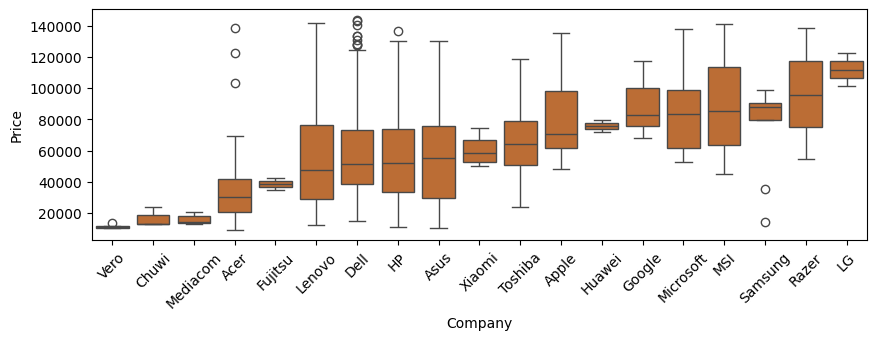

In [ ]:
plt.figure(figsize=(10, 3))

target_col = 'Price'
# to order the values by company's median price value
custom_order = clean_data.groupby('Company')[target_col].median().sort_values().index
sns.boxplot(clean_data, x='Company', y=target_col, color='#d2691e', order=custom_order)
plt.xticks(rotation=45)
plt.show()

Top 5 companies based on median price values: **LG, Razer, Samsung, MSI, Microsoft**.

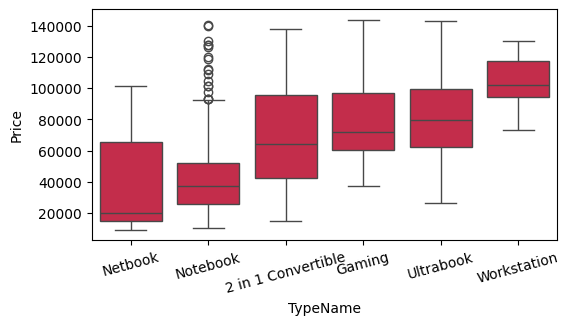

In [ ]:
plt.figure(figsize=(6, 3))

custom_order = clean_data.groupby('TypeName')[target_col].median().sort_values().index
sns.boxplot(clean_data, x='TypeName', y=target_col, color='#dc143c', order=custom_order)
plt.xticks(rotation=15)
plt.show()

Types in the order of median prices:

'**Workstation**' > '**Ultrabook**' > '**Gaming**' > '**2 in 1 Convertible**' > '**Notebook**' > '**Netbook**'.

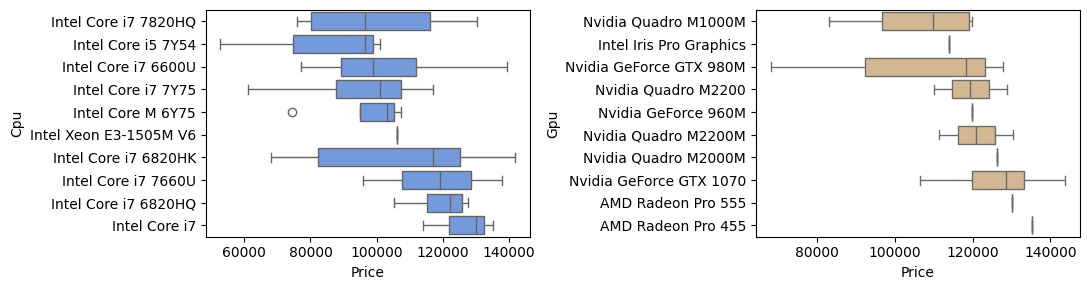

In [ ]:
# plotting top 10 cpus and gpus interms of median price values (do similarly for bottom 10)
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

custom_order = clean_data.groupby('Cpu')[target_col].median().sort_values().tail(10).index
sns.boxplot(clean_data, x=target_col, y='Cpu', color='#6495ed', ax=axes[0], order=custom_order)

custom_order = clean_data.groupby('Gpu')[target_col].median().sort_values().tail(10).index
sns.boxplot(clean_data, x=target_col, y='Gpu', color='#deb887', ax=axes[1], order=custom_order)

plt.tight_layout()
plt.show()

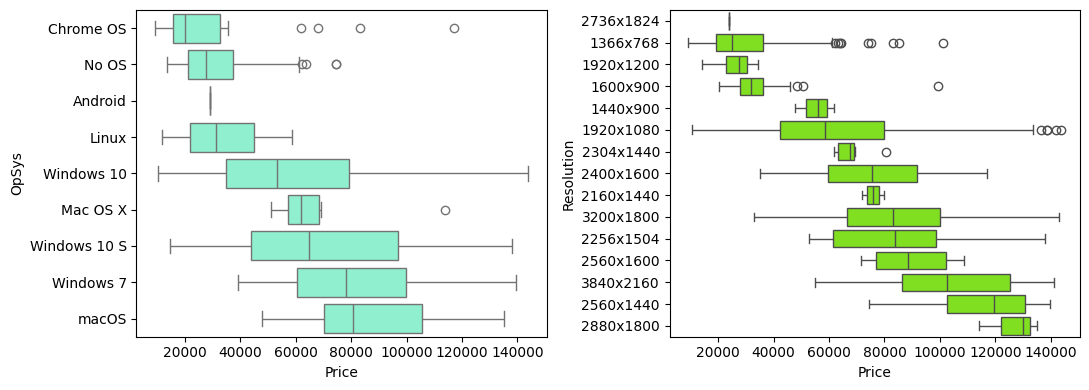

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

custom_order = clean_data.groupby('OpSys')[target_col].median().sort_values().index
sns.boxplot(clean_data, x=target_col, y='OpSys', color='#7fffd4', ax=axes[0], order=custom_order)

custom_order = clean_data.groupby('Resolution')[target_col].median().sort_values().index
sns.boxplot(clean_data, x=target_col, y='Resolution', color='#7fff00', ax=axes[1], order=custom_order)

plt.tight_layout()
plt.show()

**MacOS** and **Windows 7** are the top 2 os in median price values.

**2880x1800**, **2560x1440** and **3840x2160** are the top 3 in median price values.

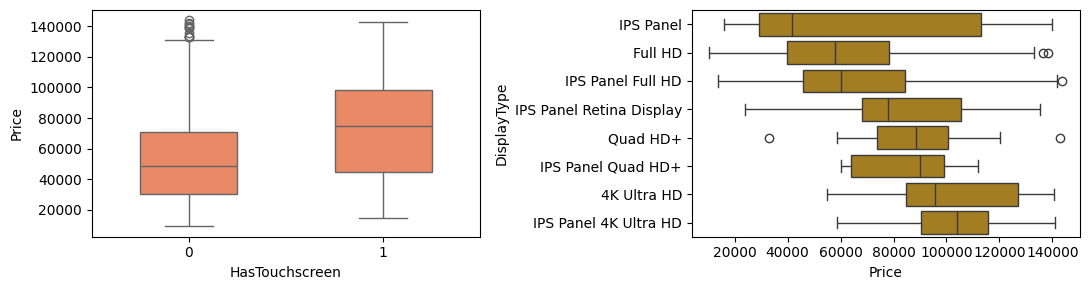

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(11, 3))
sns.boxplot(clean_data, y=target_col, x='HasTouchscreen', width=0.5, color='#ff7f50', ax=axes[0])

custom_order = clean_data.groupby('DisplayType')[target_col].median().sort_values().index
sns.boxplot(clean_data, x=target_col, y='DisplayType', color='#b8860b', ax=axes[1], order=custom_order)

plt.tight_layout()
plt.show()

Clearly those with touchscreen are more pricey.

And the 4K Ultra HD types are more pricey.

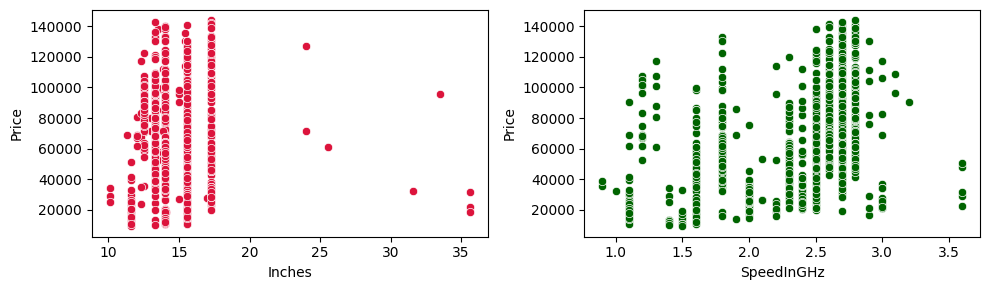

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.scatterplot(clean_data, y=target_col, x='Inches', color='#dc143c', ax=axes[0])
sns.scatterplot(clean_data, y=target_col, x='SpeedInGHz', color='#006400', ax=axes[1])

plt.tight_layout()
plt.show()

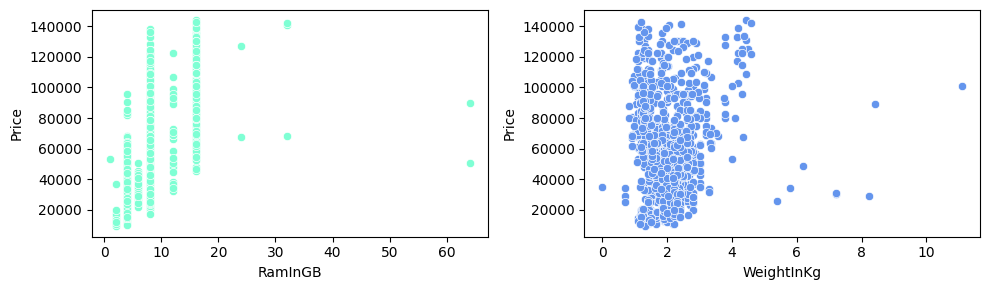

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.scatterplot(clean_data, y=target_col, x='RamInGB', color='#7fffd4', ax=axes[0])
sns.scatterplot(clean_data, y=target_col, x='WeightInKg', color='#6495ed', ax=axes[1])

plt.tight_layout()
plt.show()

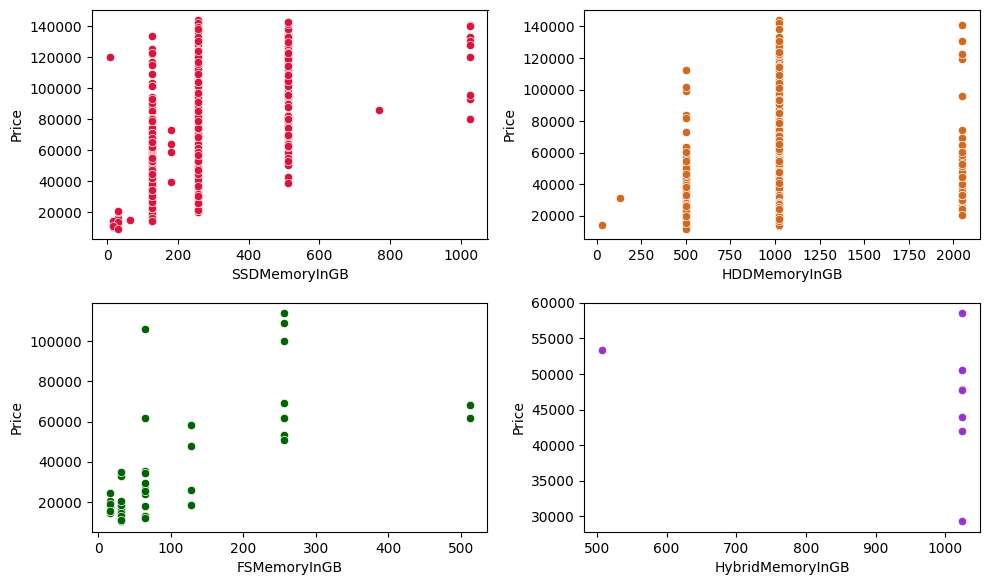

In [ ]:
# temporarily converting 0s to nan for plotting
clean_temp = clean_data.copy()
clean_temp[[*memory_cols]] = clean_data[[*memory_cols]].replace(0, np.NaN)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.scatterplot(clean_temp, y=target_col, x=memory_cols[0], color='#dc143c', ax=axes[0,0])
sns.scatterplot(clean_temp, y=target_col, x=memory_cols[1], color='#d2691e', ax=axes[0,1])
sns.scatterplot(clean_temp, y=target_col, x=memory_cols[2], color='#006400', ax=axes[1,0])
sns.scatterplot(clean_temp, y=target_col, x=memory_cols[3], color='#9932cc', ax=axes[1,1])

plt.tight_layout()
plt.show()

## Setting up for the ML models

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

data_copy = clean_data.copy()

# to encode categorical values
encoder = OrdinalEncoder()
category_cols = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'Resolution', 'DisplayType']
data_copy[[*category_cols]] = encoder.fit_transform(data_copy[[*category_cols]])

# checking out correlation values to select the useful features
data_copy.corr('spearman')

,Company,TypeName,Inches,Cpu,Gpu,OpSys,Price,Resolution,HasTouchscreen,DisplayType,SpeedInGHz,RamInGB,SSDMemoryInGB,HDDMemoryInGB,FSMemoryInGB,HybridMemoryInGB,WeightInKg
Company,1.000000,-0.031032,-0.058211,0.021863,0.030682,0.089321,0.162217,0.111065,0.019158,0.050853,0.111038,0.072777,0.143385,-0.102009,-0.101416,0.039794,-0.104896
TypeName,-0.031032,1.000000,-0.200244,-0.083251,-0.192928,0.107800,0.011675,0.005219,-0.300127,-0.009625,-0.106934,-0.093756,0.064532,-0.274080,-0.018838,-0.016204,-0.323822
Inches,-0.058211,-0.200244,1.000000,0.126407,0.226641,-0.086989,-0.116867,-0.136794,-0.353725,-0.243175,0.249269,0.098707,-0.208785,0.576215,-0.303791,0.024822,0.847625
Cpu,0.021863,-0.083251,0.126407,1.000000,0.506933,0.084332,0.567835,0.377077,0.096617,-0.006483,0.352649,0.579756,0.396805,0.082665,-0.267035,-0.008800,0.160583
Gpu,0.030682,-0.192928,0.226641,0.506933,1.000000,0.082067,0.479036,0.305801,0.003655,0.073275,0.428949,0.454808,0.256340,0.157959,-0.224504,-0.047528,0.295679
OpSys,0.089321,0.107800,-0.086989,0.084332,0.082067,1.000000,0.350264,0.188393,0.054777,0.018895,0.143506,0.157490,0.256728,-0.138724,-0.197030,0.085334,-0.089555
Price,0.162217,0.011675,-0.116867,0.567835,0.479036,0.350264,1.000000,0.611721,0.212085,0.139200,0.495734,0.745230,0.674022,-0.167005,-0.252858,-0.017149,-0.095084
Resolution,0.111065,0.005219,-0.136794,0.377077,0.305801,0.188393,0.611721,1.000000,0.282271,0.253692,0.273473,0.526604,0.534358,-0.197794,-0.136035,0.008824,-0.142270
HasTouchscreen,0.019158,-0.300127,-0.353725,0.096617,0.003655,0.054777,0.212085,0.282271,1.000000,0.193601,-0.076638,0.141189,0.224604,-0.219720,0.019429,-0.033810,-0.327420
DisplayType,0.050853,-0.009625,-0.243175,-0.006483,0.073275,0.018895,0.139200,0.253692,0.193601,1.000000,-0.072120,0.082357,0.096406,-0.120711,0.108998,-0.067366,-0.180511


In [ ]:
# let's say we only want those feature whose absolute correlation values are > 0.15
corr_df = data_copy.corr('spearman')
corr_high = corr_df[corr_df[target_col].abs() > 0.15]
corr_ordered = corr_high[target_col].sort_values(ascending=False)

# printing out columns in this scenario
print(f'Columns with high correlation values:\n{corr_high.index}\n')
print(f'Top 3 features based on correlation values:\n{corr_ordered[1:4].index}')

# selecting only these features
feature_cols = ['Company', 'Cpu', 'Gpu', 'OpSys', 'Resolution', 'HasTouchscreen',
            'SpeedInGHz', 'RamInGB', 'SSDMemoryInGB', 'HDDMemoryInGB', 'FSMemoryInGB']

# splitting features and tarrget values
X = data_copy[[*feature_cols]]
y = data_copy[target_col]

Columns with high correlation values:
Index(['Company', 'Cpu', 'Gpu', 'OpSys', 'Price', 'Resolution',
       'HasTouchscreen', 'SpeedInGHz', 'RamInGB', 'SSDMemoryInGB',
       'HDDMemoryInGB', 'FSMemoryInGB'],
      dtype='object')

Top 3 features based on correlation values:
Index(['RamInGB', 'SSDMemoryInGB', 'Resolution'], dtype='object')


In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=76ae8bc4acccd39ccf528c23758898aef121962bc04acfb835e71190761e7dc8
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=f5efa7de2230230b27c173951db4a09c8df03e49c4f7bbc0d4e75a5212b9c8f2
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# transforming the features
X = IterativeImputer().fit_transform(X)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# getting the evaluation metrics ready
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse

# function to print all the metric results
def print_metrics(yt, yp):
    print(f'R2 score: {r2_score(yt, yp)}')
    print(f'MAE: {mae(yt, yp)}')
    print(f'RMSE: {np.sqrt(mse(yt, yp))}')

## ML Models and their performance

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {'Linear Regression': LinearRegression(), 'SVR': SVR(), 'Random Forest Regressor':
          RandomForestRegressor(random_state=42), 'Gradient Boosting Regressor':
          GradientBoostingRegressor(random_state=42)}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('\nModel Name:', name)
    print_metrics(y_test, y_pred)


Model Name: Linear Regression
R2 score: 0.6895248008682139
MAE: 13607.169745585676
RMSE: 17907.669867183013

Model Name: SVR
R2 score: -0.015588150173461601
MAE: 26167.88592923865
RMSE: 32388.022682000214

Model Name: Random Forest Regressor
R2 score: 0.7759373766682669
MAE: 10665.663757816475
RMSE: 15212.84115126288

Model Name: Gradient Boosting Regressor
R2 score: 0.8018242502608047
MAE: 10609.007889098788
RMSE: 14307.07577222763


From the results, we can see that **Gradient Boosting Regressor** performed better than the rest.

In [ ]:
# check if the model is overfitting
best_model = models['Gradient Boosting Regressor']
best_model.fit(X_train, y_train)

# model score for train and test data
best_model.score(X_train, y_train), best_model.score(X_test, y_test)

(0.8641724321452855, 0.8018242502608047)

It doesn't seem like the model is overfitting.

Let's try Parameter Tuning to observe if the performance improves.

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
import optuna

# set the optuna's logging to warning level (kind of similar to verbose = False)
optuna.logging.set_verbosity(optuna.logging.WARNING)

# function for optuna optimization
def objective(trial):
    model = GradientBoostingRegressor(
        n_estimators = trial.suggest_int('n_estimators', 50, 300),
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        max_depth = trial.suggest_int('max_depth', 3, 10),
        subsample = trial.suggest_float('subsample', 0.5, 1.0),
        random_state = 42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return mse(y_test, y_pred)

In [ ]:
# create a study for optimization
study = optuna.create_study(direction='minimize')  # minimize MSE
study.optimize(objective, n_trials=50)  # run 50 trials

study.best_params

{'n_estimators': 260,
 'learning_rate': 0.07191147467461234,
 'max_depth': 3,
 'subsample': 0.6194943394842175}

In [ ]:
# applying the best parameters
tuned_model = GradientBoostingRegressor(n_estimators=260, learning_rate=0.0719, max_depth=3,
                                        subsample=0.6195, random_state=42)
tuned_model.fit(X_train, y_train)
y_pred = tuned_model.predict(X_test)

# checking the performance
print_metrics(y_test, y_pred)

# checking for overfitting
print(f'\n{tuned_model.score(X_train, y_train)}, {tuned_model.score(X_test, y_test)}')

R2 score: 0.8190157944486011
MAE: 9901.072431000988
RMSE: 13672.437921313114

0.8989509439242861, 0.8190157944486011


We can confirm that the tuned model is performing better than the normal model and is also not overfitting.

## Conclusion

The fine-tuned **Gradient Boosting Regressor** model seems to perform well and doesn't overfit.
Hence, it is the best choice.

Top 3 features having the highest correlation with the target column is:
**RamInGB**, **SSDMemoryInGB**, and **Resolution**.